# TS3: Análisis de Fourier: FFT, desparramo, interpolación y ventaneo

hola

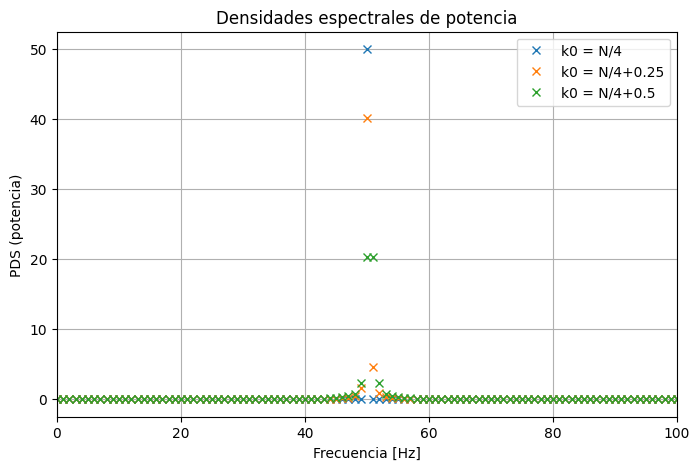

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft

N=200
fs=N
df=fs/N
Ts=1/fs

def sen(f,n,A=1,fase=0,fs=2):
    N=np.arange(n)
    t=N/fs
    x=A*np.sin(2*np.pi*f*t+fase)
    return t,x

t1,x1=sen(f=(N/4)*df,n=N,fs=fs)
t2,x2=sen(f=((N/4)+0.25)*df,n=N,fs=fs)
t2,x3=sen(f=((N/4)+0.5)*df,n=N,fs=fs)

X1=fft(x1)
X1abs=np.abs(X1)
X1ang=np.angle(X1)

X2=fft(x2)
X2abs=np.abs(X2)
X2ang=np.angle(X2)

X3=fft(x3)
X3abs=np.abs(X3)
X3ang=np.angle(X3)

PSD1 = (np.abs(X1)**2)/N
PSD2 = (np.abs(X2)**2)/N
PSD3 = (np.abs(X3)**2)/N


F=np.arange(N)*df

plt.figure(figsize=(8,5))
plt.plot(F, PSD1, "x", label="k0 = N/4")
plt.plot(F, PSD2, "x", label="k0 = N/4+0.25")
plt.plot(F, PSD3, "x", label="k0 = N/4+0.5")
plt.legend()
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("PDS")
plt.title("Densidades espectrales de potencia")
plt.grid(True)
plt.xlim([0, fs/2])  # solo hasta Nyquist
plt.show()



In [47]:
# dominio del tiempo
P_time1 = np.mean(x1**2)
P_time2 = np.mean(x2**2)
P_time3 = np.mean(x3**2)

#  dominio de la frecuencia (Parseval)
P_freq1 = np.sum(PSD1)/N
P_freq2 = np.sum(PSD2)/N
P_freq3 = np.sum(PSD3)/N

print("Señal k0 = N/4:     Potencia tiempo = %.6f,  Potencia freq = %.6f" % (P_time1, P_freq1))
print("Señal k0 = N/4+0.25: Potencia tiempo = %.6f,  Potencia freq = %.6f" % (P_time2, P_freq2))
print("Señal k0 = N/4+0.5:  Potencia tiempo = %.6f,  Potencia freq = %.6f" % (P_time3, P_freq3))


Señal k0 = N/4:     Potencia tiempo = 0.500000,  Potencia freq = 0.500000
Señal k0 = N/4+0.25: Potencia tiempo = 0.497500,  Potencia freq = 0.497500
Señal k0 = N/4+0.5:  Potencia tiempo = 0.500000,  Potencia freq = 0.500000


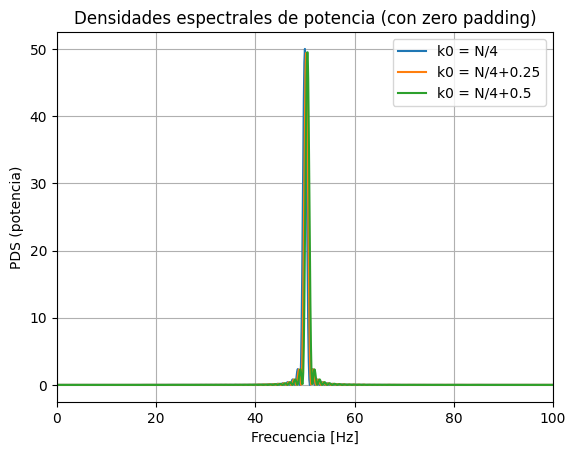

In [48]:
Nz = 9 * N   
df=fs/Nz

X1z = fft(x1, n=Nz)   
X2z = fft(x2, n=Nz)
X3z = fft(x3, n=Nz)

PSD1z = (np.abs(X1z)**2)/N  
PSD2z = (np.abs(X2z)**2)/N
PSD3z = (np.abs(X3z)**2)/N

F=np.arange(Nz)*df

plt.plot(F, PSD1z, label="k0 = N/4")
plt.plot(F, PSD2z, label="k0 = N/4+0.25")
plt.plot(F, PSD3z, label="k0 = N/4+0.5")
plt.legend()
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("PDS ")
plt.title("Densidades espectrales de potencia (con zero padding)")
plt.grid(True)
plt.xlim([0, fs/2])
plt.show()